In [1]:
set.seed(123)
getwd()
setwd("/liulab/galib/dlbcl_manuscript/")
library(rBCS)
library(tidyverse)
library(Seurat)
library(harmony)
library(viridis)
library(RColorBrewer)
library(Polychrome)
PurpleAndYellow()
library(ComplexHeatmap)
library(devtools)
library(presto)
library(dplyr)
library(ggplot2)
library(ggpubr)
library(readxl)
source("./scripts/scplot.R")

[1] "/liulab/galib/dlbcl_manuscript/scripts"

Warning message:
“package ‘rBCS’ was built under R version 4.1.3”
Warning message:
“package ‘tidyverse’ was built under R version 4.1.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.0      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.1 

Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
Warning message:
“package ‘forcats’ was built under R version 4.1.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching SeuratObject

Attaching sp

Warning message:
“package ‘harmony’ was built under R version 4.1.3”
Loading required package: Rcpp

Warning message:
“package ‘Rcpp’ was built under R version 4.1.2”
Loading required package: viridisLite

Warning message:
“pack

[1] "#FF00FF" "#F400F4" "#EA00EA" "#DF00DF" "#D500D5" "#CA00CA" "#BF00BF"
 [8] "#B500B5" "#AA00AA" "#9F009F" "#950095" "#8A008A" "#800080" "#750075"
[15] "#6A006A" "#600060" "#550055" "#4A004A" "#400040" "#350035" "#2B002B"
[22] "#200020" "#150015" "#0B000B" "#000000" "#000000" "#0B0B00" "#151500"
[29] "#202000" "#2B2B00" "#353500" "#404000" "#4A4A00" "#555500" "#606000"
[36] "#6A6A00" "#757500" "#808000" "#8A8A00" "#959500" "#9F9F00" "#AAAA00"
[43] "#B5B500" "#BFBF00" "#CACA00" "#D4D400" "#DFDF00" "#EAEA00" "#F4F400"
[50] "#FFFF00"

Warning message:
“package ‘ComplexHeatmap’ was built under R version 4.1.3”
Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


Loading required package: usethis

Warning message:
“package ‘presto’ was built under R version 4.1.3”
Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The

In [2]:
B_cell<- readRDS("./data/objects/B_cell_final.rds")

In [4]:
B_cell_meta<- B_cell@meta.data

In [35]:
B_cell_shm_analysis<- read_xlsx('./data/sample_cluster_diversity.xlsx')  %>% filter(celltype=='bcell')

New names:
• `` -> `...1`


In [36]:
B_cell_meta$shm_key = paste0(B_cell_meta$sample_id, '_', B_cell_meta$seurat_clusters)
B_cell_shm_analysis$shm_key = paste0(B_cell_shm_analysis$id, '_', B_cell_shm_analysis$cluster)
B_cell_shm_analysis<- B_cell_shm_analysis  %>%  select(shm_key, SHM, SHM_size)
B_cell_meta<- B_cell_meta  %>% left_join(y = B_cell_shm_analysis, by = 'shm_key')

In [41]:
B_cell_meta$UMAP_1<- B_cell@reductions$umap@cell.embeddings[,1]
B_cell_meta$UMAP_2<- B_cell@reductions$umap@cell.embeddings[,2]

In [49]:
B_cell_meta$SHM  %>% range(na.rm = TRUE)
B_cell_meta$SHM  %>% quantile(na.rm = TRUE)
B_cell_meta$SHM  %>% quantile(na.rm = TRUE, 0.90)
mycol = brewer.pal(9,"RdPu")

[1]  0.00 12.16

0%        25%        50%        75%       100% 
 0.0000000  0.0497561  0.4414706  0.9042105 12.1600000

90% 
1.465

In [56]:
B_cell_meta[!is.na(B_cell_meta$SHM) & (B_cell_meta$SHM > 6), 'SHM'] = 6

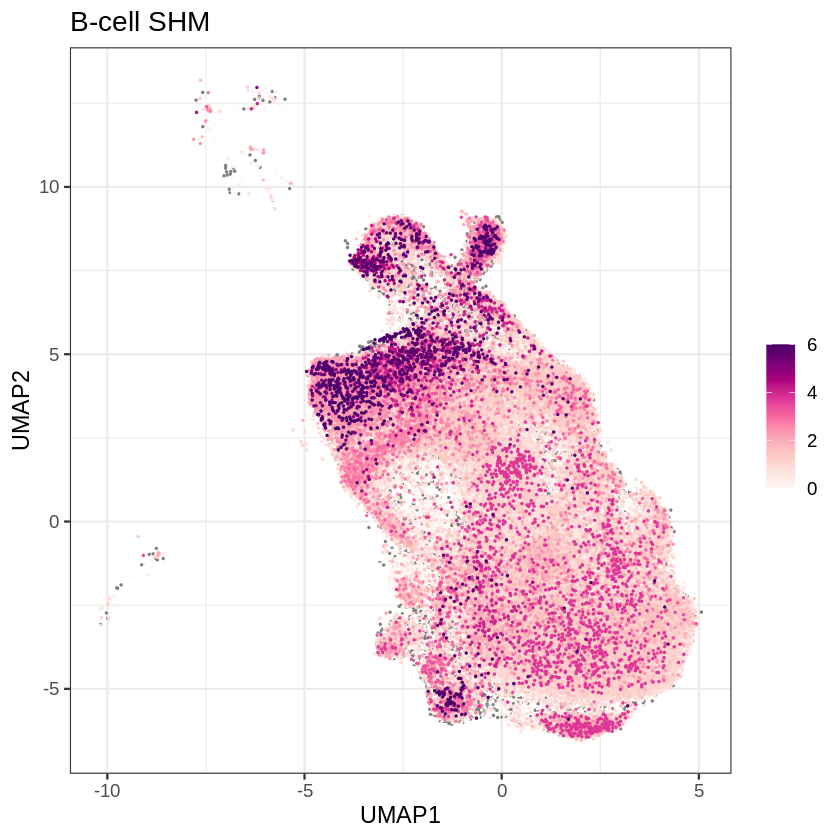

In [59]:
B_cell_meta %>%
    mutate(age = factor(age, levels = c("6mos", "14mos", "18mos", "sick")))  %>% 
    mutate(genotype = factor(genotype, levels = c("WT", "CD70-/-", "Bcl6tg/+", "CD70-/-;Bcl6tg/+")))  %>%
    mutate(is_na= !is.na(SHM)) %>% 
    arrange(is_na, SHM)  %>%
    ggplot(aes(x = UMAP_1, y= UMAP_2)) +
    geom_point(aes(color = SHM), size = 0.3) +
    scale_color_gradientn(colours = mycol, breaks = c(0, 2, 4, 6)) +
    theme_bw(base_size = 14) +
    labs(x = "UMAP1", y = "UMAP2", title = "B-cell SHM") +
    theme(legend.title=element_blank())

ggsave("./results/8_B_cell_SHM.pdf", width = 12, height = 10)

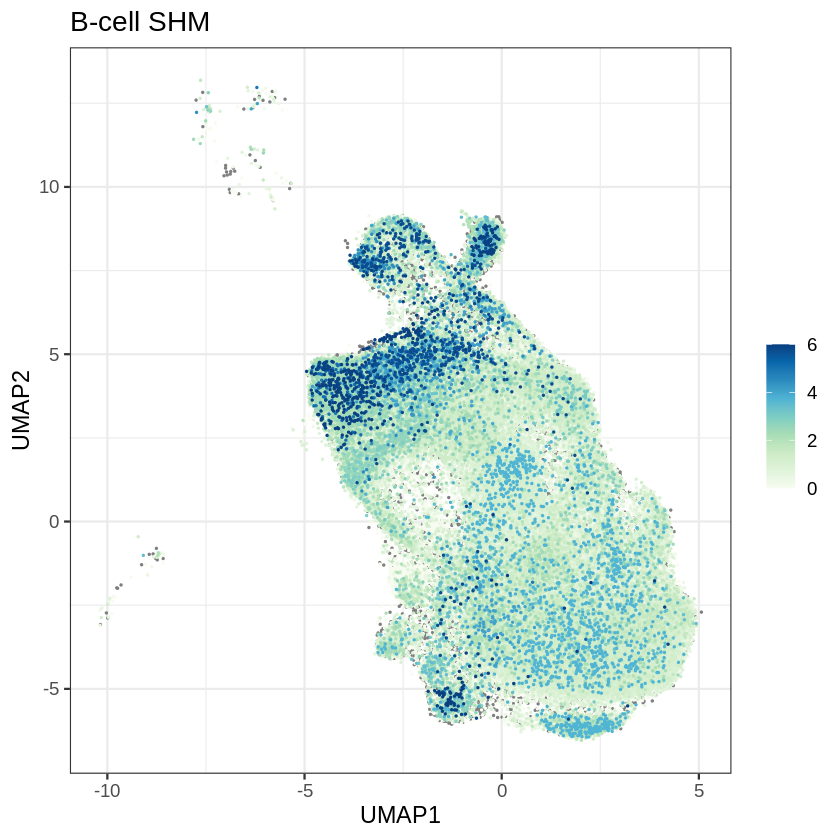

In [60]:
mycol = brewer.pal(9,"GnBu")
B_cell_meta %>%
    mutate(age = factor(age, levels = c("6mos", "14mos", "18mos", "sick")))  %>% 
    mutate(genotype = factor(genotype, levels = c("WT", "CD70-/-", "Bcl6tg/+", "CD70-/-;Bcl6tg/+")))  %>%
    mutate(is_na= !is.na(SHM)) %>% 
    arrange(is_na, SHM)  %>%
    ggplot(aes(x = UMAP_1, y= UMAP_2)) +
    geom_point(aes(color = SHM), size = 0.3) +
    scale_color_gradientn(colours = mycol, breaks = c(0, 2, 4, 6)) +
    theme_bw(base_size = 14) +
    labs(x = "UMAP1", y = "UMAP2", title = "B-cell SHM") +
    theme(legend.title=element_blank())

ggsave("./results/8_B_cell_SHM_blue.pdf", width = 12, height = 10)

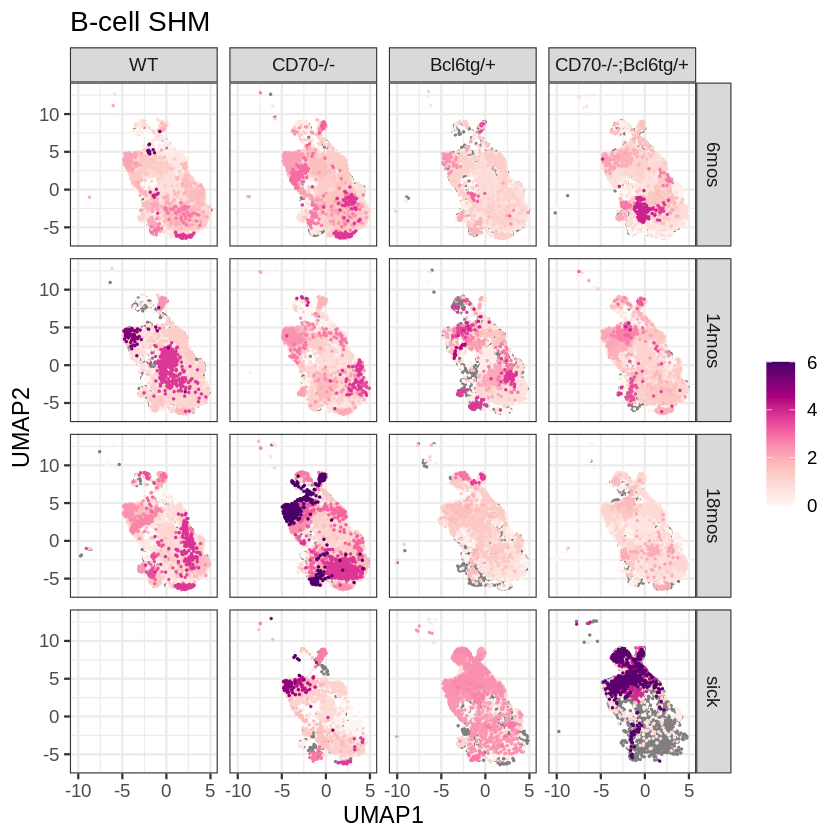

In [58]:
B_cell_meta %>%
    mutate(age = factor(age, levels = c("6mos", "14mos", "18mos", "sick")))  %>% 
    mutate(genotype = factor(genotype, levels = c("WT", "CD70-/-", "Bcl6tg/+", "CD70-/-;Bcl6tg/+")))  %>%
    mutate(is_na= !is.na(SHM)) %>% 
    arrange(is_na, SHM)  %>%
    ggplot(aes(x = UMAP_1, y= UMAP_2)) +
    geom_point(aes(color = SHM), size = 0.3) +
    scale_color_gradientn(colours = mycol, breaks = c(0, 2, 4, 6)) +
    theme_bw(base_size = 14) +
    labs(x = "UMAP1", y = "UMAP2", title = "B-cell SHM") +
    theme(legend.title=element_blank()) +
    facet_grid(age ~ genotype)

ggsave("./results/8_B_cell_SHM_by_genotype_age.pdf", width = 12, height = 10)